# Facial Expression Dataset: Face Detection with MTCNN

Our goal is to **extract the face regions** from each image using a **pretrained face detector** to later use them in classification or other downstream tasks.

## Model Used: MTCNN
 We use **MTCNN (Multi-task Cascaded Convolutional Networks)**, a robust and widely used model for face detection.

**Why MTCNN?**
- Detects faces with high accuracy, even under occlusions or various angles.
- Returns facial landmarks (eyes, nose, mouth) along with the bounding box.
- Lightweight and easy to integrate.

> **Source**: Zhang et al., "Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks," IEEE SPL 2016.


## Imports

In [13]:
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from PIL import Image
import os

## Face Detection Function

This function takes an image path, applies MTCNN to detect faces, and returns the face region (cropped). This is specially useful for those cases in which the image is not centered or has a noticeable background that could introduce noise in the models.

In [14]:
detector = MTCNN()

In [15]:
def detect_and_crop_face(image_path, save_cropped=False, save_dir="cropped_faces"):
    """
    Detects a face in the image and returns a cropped face region.

    Parameters:
    - image_path: str, path to the image
    - save_cropped: bool, whether to save the cropped face to disk
    - save_dir: str, directory to save cropped faces

    Returns:
    - cropped_face (PIL.Image) or None if no face is detected
    """
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    results = detector.detect_faces(image)

    if results:
        x, y, w, h = results[0]['box']
        face = image[y:y+h, x:x+w]
        face_pil = Image.fromarray(face)

        if save_cropped:
            os.makedirs(save_dir, exist_ok=True)
            filename = os.path.basename(image_path)
            face_pil.save(os.path.join(save_dir, filename))

        return face_pil
    else:
        print(f"No face detected in {image_path}")
        return None  
  

### Example: Test Face Detection on One Image

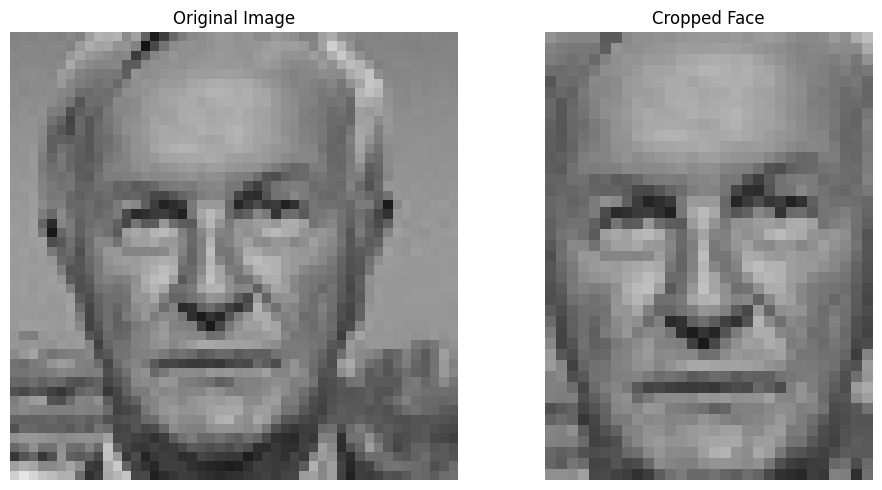

In [16]:
test_image_path = "../dataset/train/angry/Training_14532305.jpg"

# Detect and crop face
cropped_face = detect_and_crop_face(test_image_path)

# Load original image
original_img = cv2.imread(test_image_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

if cropped_face is not None:
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(original_img)
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(cropped_face)
    axs[1].set_title("Cropped Face")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("No face detected.")

### Batch Face Detection on Folder

This batch function was not executed due to limited computational resources. However, our main goal was to extract faces by removing background and noise, enabling us to train the model on this newly generated, cleaner dataset.

In [17]:
def detect_faces_in_folder(folder_path, save_dir="cropped_faces_batch"):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    for img_name in image_files:
        img_path = os.path.join(folder_path, img_name)
        detect_and_crop_face(img_path, save_cropped=True, save_dir=save_dir)